In [46]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, geopandas as gpd
import matplotlib.pyplot as plt

import functools
import community
import time
import math

from scipy import sparse
from scipy.sparse import linalg
from math import sqrt
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping
from shapely.ops import cascaded_union

pd.set_option('precision', 10)
%matplotlib inline

# Functions

In [64]:
roads.to_file(folder_ouptut+city_name+'_natural.shp', driver='ESRI Shapefile')

# NetworkX

In [337]:
pos = {}

for i in range(0,len(Gc.nodes(1))):
        coor = (Gc.nodes(1)[i][1]['x'],Gc.nodes(1)[i][1]['y'])
        pos[i]=coor

In [338]:
Ng = nx.Graph() #Empty graph

Ng.add_nodes_from(pos.keys()) #Add nodes preserving coordinates

In [339]:
for i in range(0,len(Ng.nodes())):
    Ng.node[i]['x']=pos[i][0]
    Ng.node[i]['y']=pos[i][1]

In [340]:
for i in list(Gc.edges()):
    Ng.add_edge(i[0], i[1])

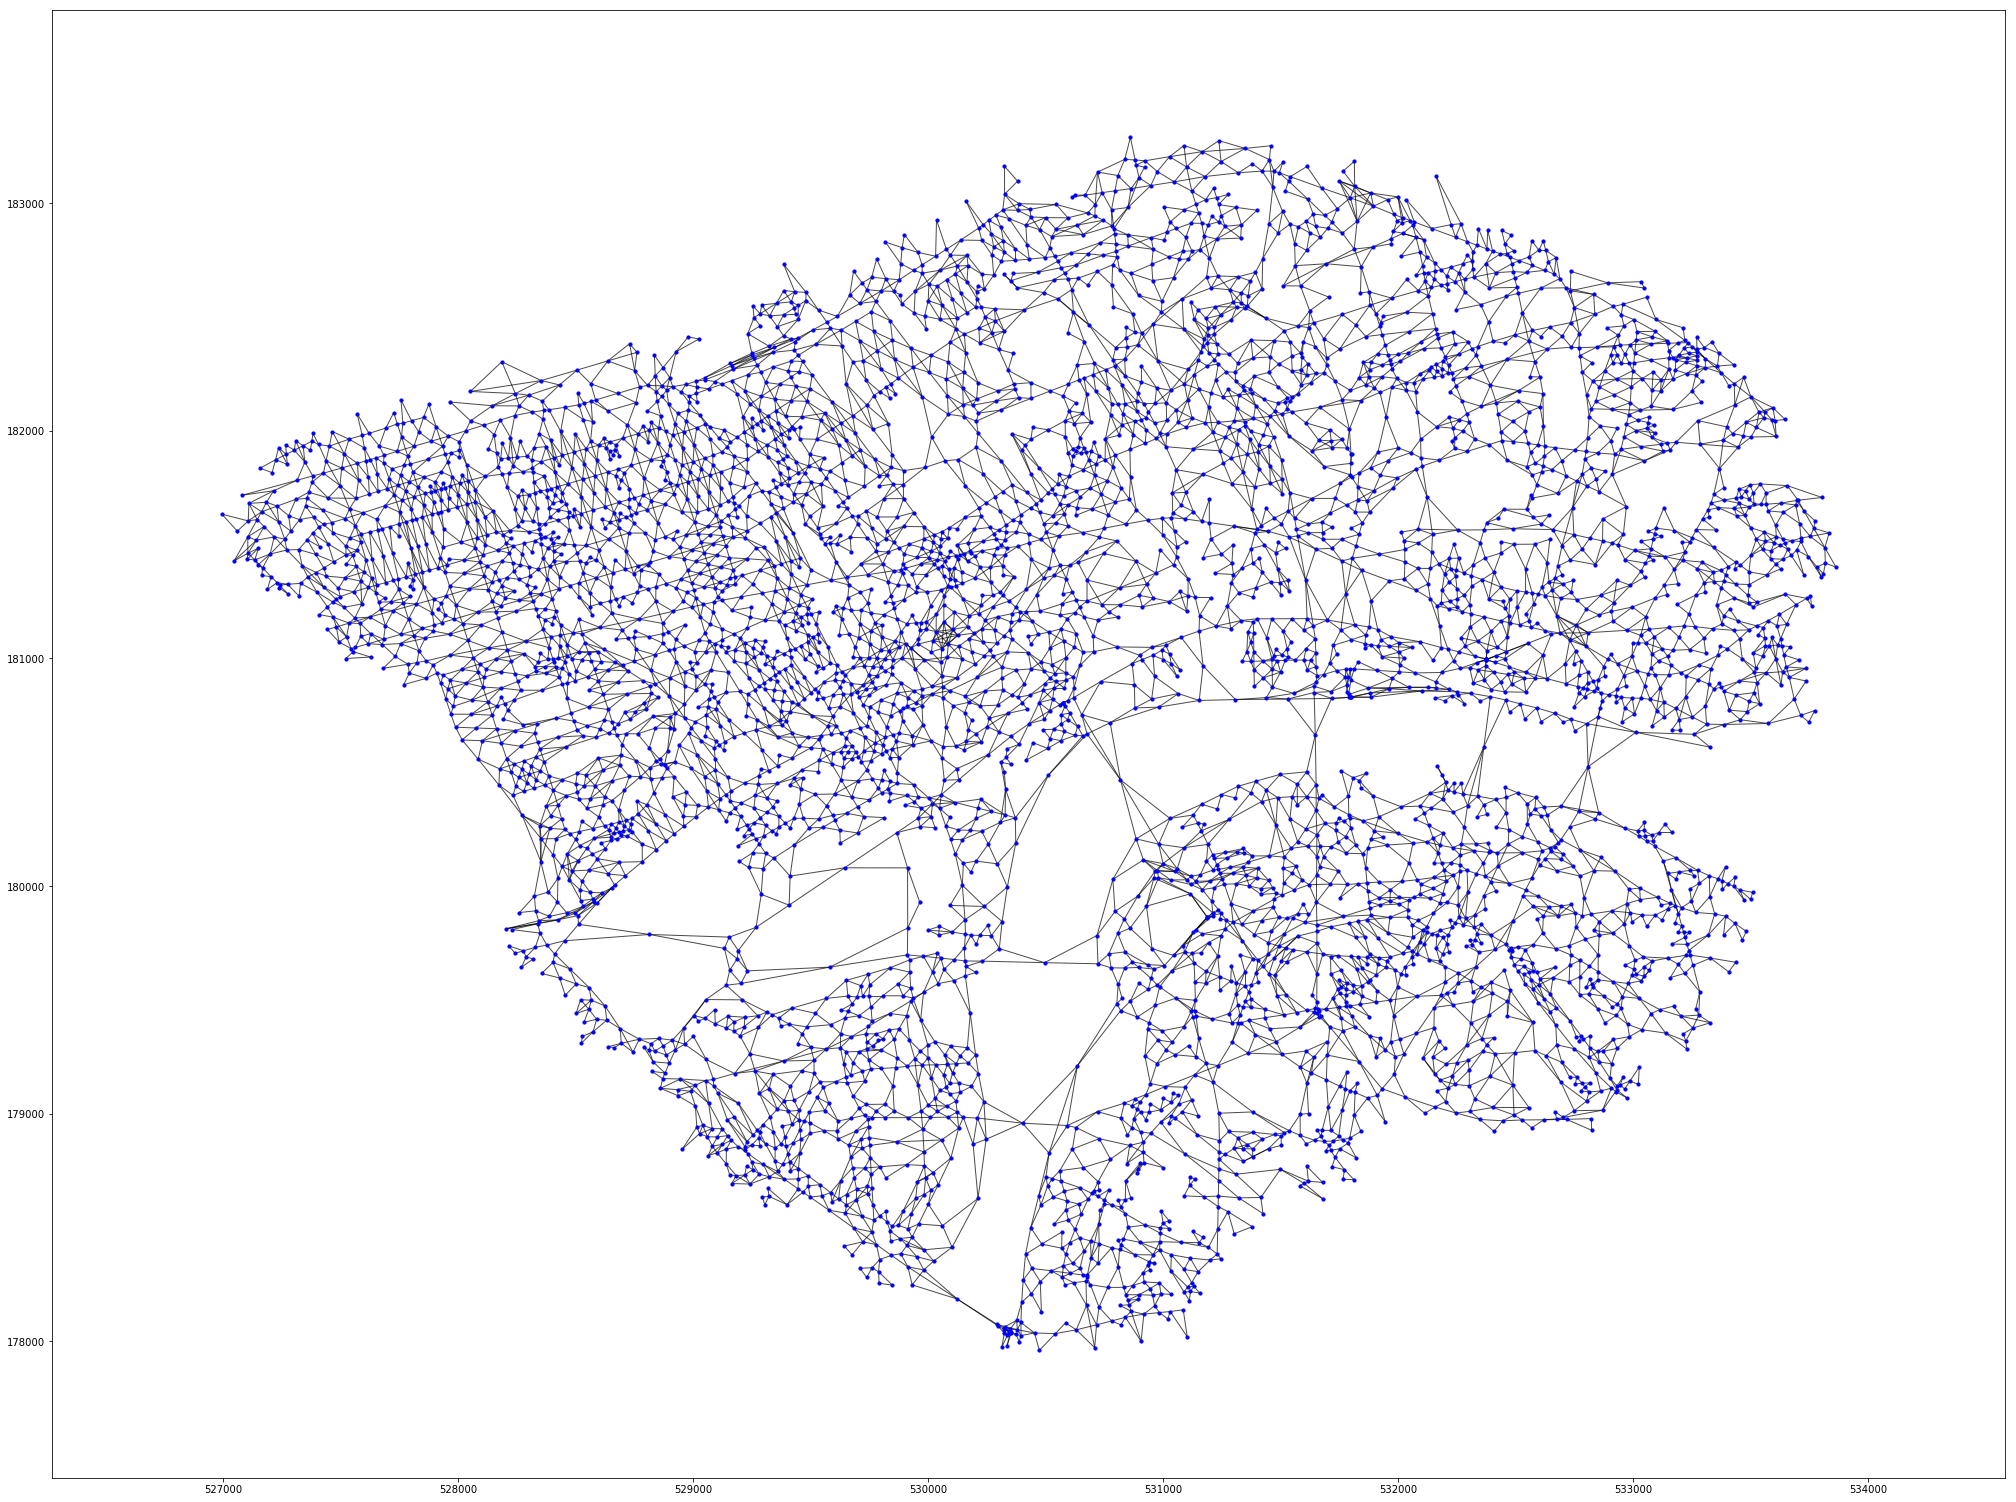

In [341]:
plt.figure(figsize=(35,27))
nx.draw_networkx_nodes(Gc,pos,node_size=10,node_color='b')
nx.draw_networkx_edges(Gc,pos, alpha=0.7)

In [336]:
len(Ng.edges())

11426

In [330]:
Gn = Gn.to_undirected()

NameError: name 'Gn' is not defined

In [331]:
L = nx.line_graph(Ng)

In [334]:
partition = community.best_partition(L)

In [335]:
partition

{(650, 3841): 0,
 (3838, 3841): 0,
 (4256, 4264): 1,
 (4264, 5375): 1,
 (2576, 2578): 2,
 (2578, 2579): 2,
 (4388, 4392): 3,
 (4392, 4394): 3,
 (476, 2601): 4,
 (2592, 2601): 4,
 (2852, 2853): 5,
 (2853, 2856): 5,
 (3598, 3678): 6,
 (3669, 3678): 6,
 (1932, 1933): 7,
 (1933, 1936): 7,
 (2923, 2925): 8,
 (2925, 3080): 8,
 (2292, 2295): 9,
 (2295, 2302): 9,
 (3213, 3217): 10,
 (3217, 3361): 10,
 (1448, 1449): 9,
 (1449, 1451): 9,
 (1712, 1760): 11,
 (1760, 1770): 11,
 (1544, 1546): 12,
 (1544, 4721): 12,
 (4868, 5098): 13,
 (4868, 5101): 13,
 (946, 948): 14,
 (946, 951): 14,
 (2474, 2528): 15,
 (2528, 2531): 15,
 (1886, 2697): 16,
 (1889, 2697): 16,
 (205, 4635): 12,
 (205, 4636): 12,
 (179, 1371): 9,
 (180, 1371): 9,
 (4691, 4788): 17,
 (4781, 4788): 17,
 (3511, 3513): 18,
 (3511, 3542): 18,
 (2157, 2158): 19,
 (2158, 2161): 19,
 (961, 962): 14,
 (962, 963): 20,
 (2086, 2140): 7,
 (2086, 2142): 7,
 (267, 306): 21,
 (305, 306): 21,
 (3045, 3047): 10,
 (3047, 3055): 10,
 (3668, 3671): 22,

In [267]:
import pylab
import random

n=(max(partition.values()))+1
cm = pylab.get_cmap('nipy_spectral')

In [268]:
cgen = list(cm(1.*i/n) for i in range(n))

In [269]:
random.shuffle(cgen)

In [270]:
nx.set_edge_attributes(Ng, 'partition', partition)

TypeError: 'int' object is not iterable

In [594]:
for u,v,d in Gn.edges(data=True):
    d['color']=cgen[d['partition']]

In [596]:
colors = [Gn[u][v]['color'] for u,v in edges]
part = [Gn[u][v]['partition'] for u,v in edges]

C:\Users\gabri\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\gabri\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\gabri\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\gabri\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

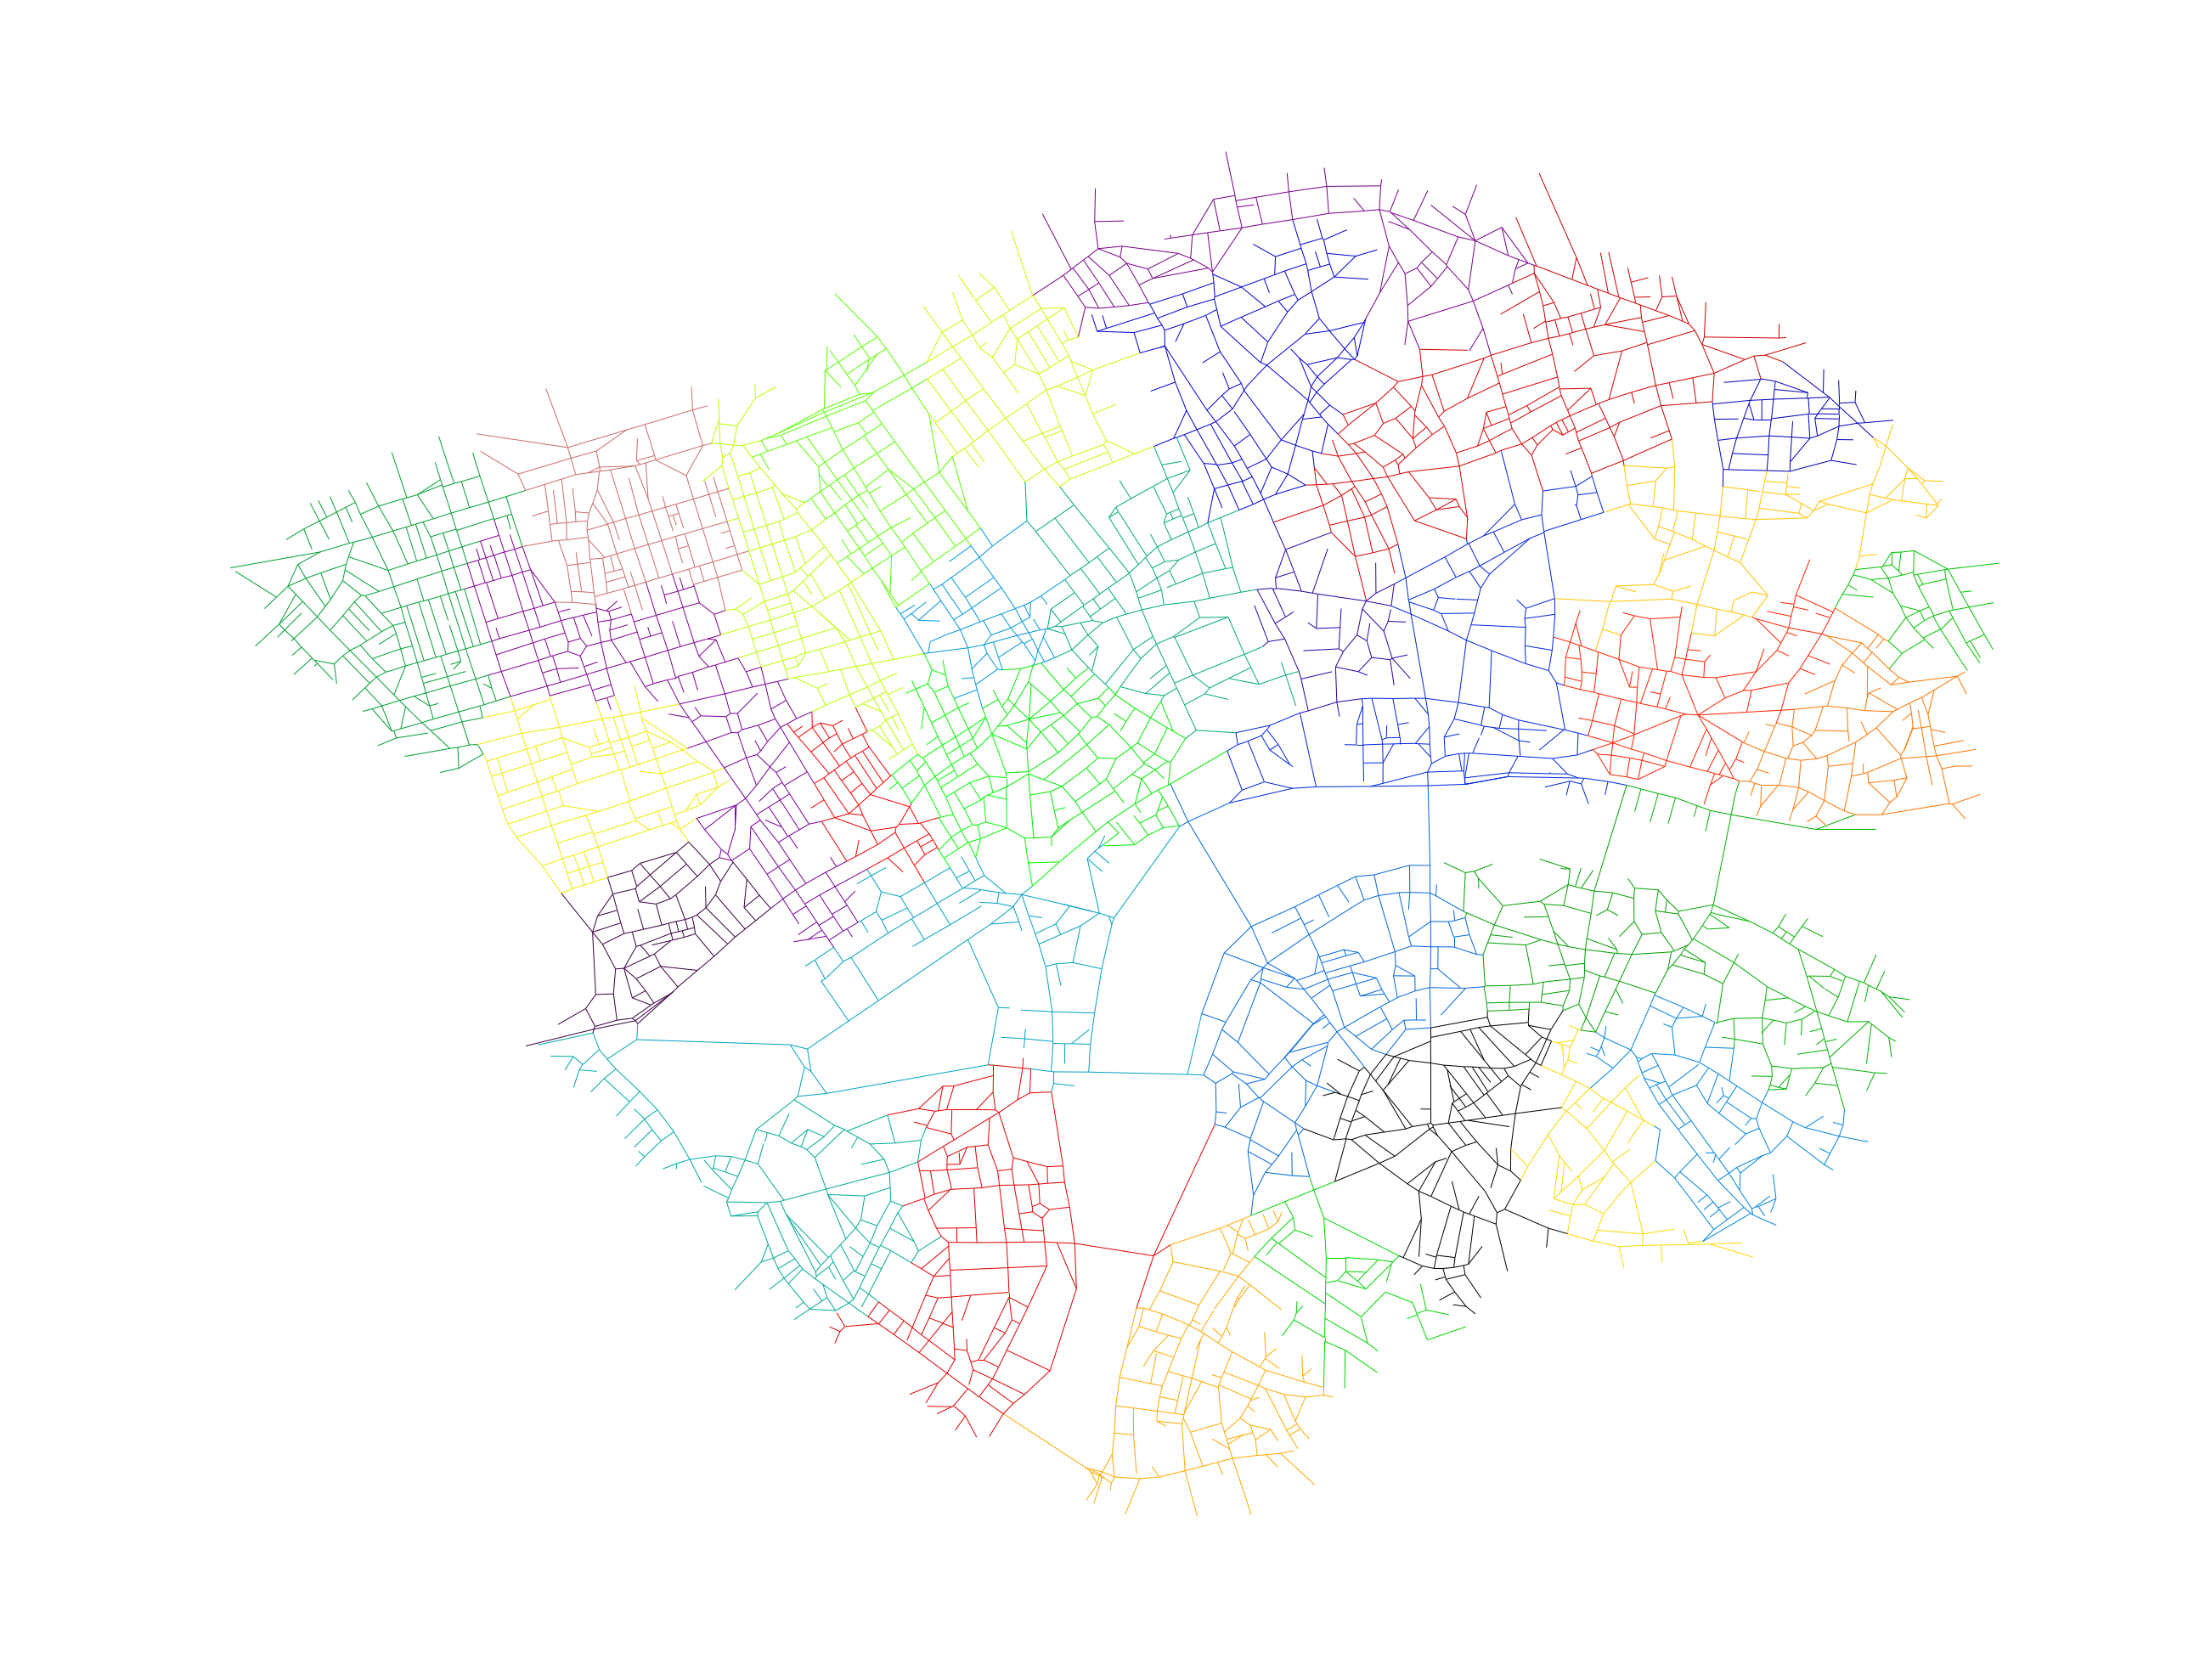

In [597]:
plt.figure(figsize=(35,27))
nx.draw(Gn,pos,alpha=1, node_size=0,edge_color=colors)

# Buffered

In [ ]:
for row in buildings_tmp.itertuples():
    
    g = row[6] #geometry
    fil = g.buffer(120)
    OS_index = row[2]
    copy_tmp = copy.loc[copy.ID != OS_index]
    
    sindex = copy_tmp.sindex
    possible_matches_index = list(sindex.intersection(fil.bounds))
    possible_matches = copy_tmp.iloc[possible_matches_index]
    
    polygon = MultiPolygon([pol for pol in possible_matches['geometry']])
    
    i=2
    try:
        while(g.buffer(i).intersects(polygon)==False): 
            i=i+2
    except:
        while(g.buffer(i).distance(polygon)>0):
            i=i+2
    
    area_max = (g.buffer(i-2)).area-(g.area)
    if (area_max < 0):
        area_max = 0

    buildings_tmp.set_value(row[0], 'prominence', area_max)

In [ ]:
def clean_intersections_short(G, tolerance, dead_ends=False):

    # if dead_ends is False, discard dead-end nodes to only work with edge intersections
    if not dead_ends:
        if 'streets_per_node' in G.graph:
            streets_per_node = G.graph['streets_per_node']
        else:
            streets_per_node = count_streets_per_node(G)

        dead_end_nodes = [node for node, count in streets_per_node.items() if count <= 1]
        G = G.copy()
        G.remove_nodes_from(dead_end_nodes)

    # create a GeoDataFrame of nodes, buffer to passed-in distance, merge overlaps
    gdf_nodes = ox.graph_to_gdfs(G, edges=False)
    buffered_nodes = gdf_nodes.buffer(tolerance).unary_union
    if isinstance(buffered_nodes, Polygon):
        # if only a single node results, make it iterable so we can turn it into a GeoSeries
        buffered_nodes = [buffered_nodes]

    # get the centroids of the merged intersection polygons
    unified_intersections = gpd.GeoSeries(list(buffered_nodes))
    #intersection_centroids = unified_intersections.centroid
    return unified_intersections

In [ ]:
buffered_nodes = clean_intersections_short(G_projected, tolerance=15, dead_ends=False)
centroids = ox.clean_intersections(G_projected, tolerance=15, dead_ends=False)

In [ ]:
p = []

for points in centroids:
    t = mapping(points)
    p.append(t)
    
centroid_list = []
for points in p:
    centroid_list.append(points['coordinates'])
    


In [ ]:
buffered_intersections

In [ ]:
for polygon in buffered_intersections:
    t = mapping(polygon)

In [ ]:
t

In [ ]:
a = []

for polygon in buffered_intersections:
    t = mapping(polygon)
    a.append(t)

coord = []
for polygon in a:
    coord.append(polygon['coordinates'])
    
groups = []
for f in range(0,len(coord)):
    l = coord[f]
    groups.append(list(l[0]))

In [ ]:
temp = {}
old_nodes = []
coor = []
for i in range(0, len(nodes_list)):
    cod = nodes_list[i][0]
    x = nodes_list[i][1]['x']
    y = nodes_list[i][1]['y']
    temp = {cod: (x,y)}
    c = (x,y)
    old_nodes.append(temp)
    coor.append(c)